# Principal Component Analysis
PCA, Principal Component Analysis, is a method used in machine learning and statistics to simplify and reduce the dimension of the data. The goal of the pca is to indentify the patterns in data and detect the coorelation between variables.

if the dimensions are variables lines or paths the data can walk along, then having alot of dimension is like having too many paths-it can make realy hard to find most important paths.PCA heps to simplify by finding most important paths(principal components) and getting rid of the less important one.
## key terms 
**`Principal compenents`**: A principal component is a linear combination of the original variables in a dataset that captures the maximum variance or information.
1. PCA 1 captures the most variantion then PCA2

**`covariance matrix`**: A covariance matrix is a square matrix that summarizes the covariance relationship between mutliple variables in a dataset.

**`Eigen value`**:Eigen value determines how much variance will be explained by its assoicated eigenvector. Larger eigenvalues indicate that their assoicated eigenvector capture more variance in the data making them more significant in representing the data variability.

**`Eigen vector`**: An eigen vector in principal comepnent analysis is a vector that represents a direction in the original feature space along which the data varies the most. in other words, eigenvectors are the basis for the new feature space (principal compoenets) that are generated during PCA.

**`scree plot`**:A scree plot is a graphical representation used in Principal Compoenent Analysis to visualize the variance explained by each principal component

**`loading score`**:loading score represents the coorelation between origianl features and principal components. These scores indicated how much each original variable contributes to each principal component.

**`Bi plot`**: 


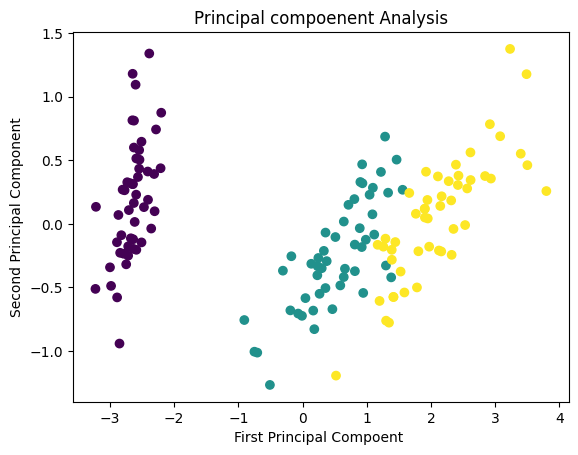

In [8]:
# an example of pca in python 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
# load iris dataset 
iris = load_iris()

# let's say we want the reduce the dataset into two dimensions 
pca = PCA(n_components=2)
# fit and transform the data 
iris_pca = pca.fit_transform(iris.data)
# now we can plot the first two components 
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris.target)
plt.xlabel('First Principal Compoent ')
plt.ylabel('Second Principal Component')
plt.title ('Principal compoenent Analysis')
plt.show()


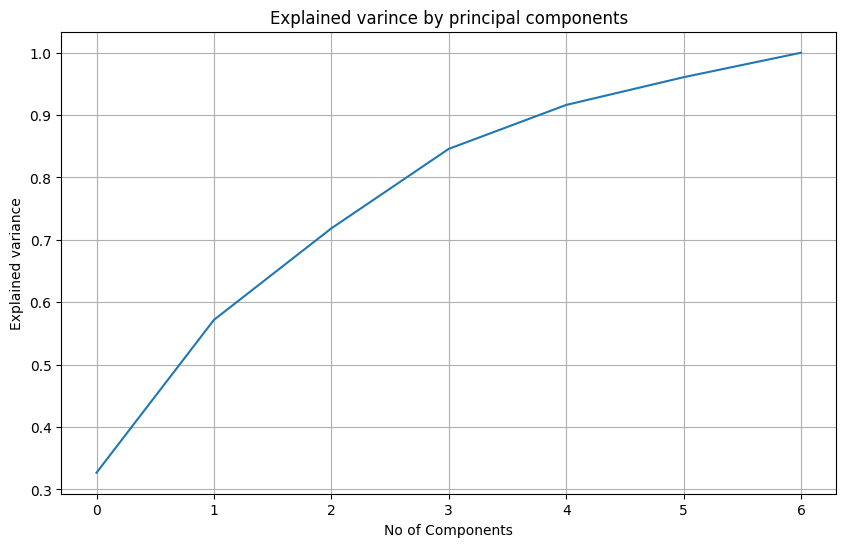

                 pc1       pc2       pc3       pc4       pc5       pc6  \
total_bill  0.577289  0.133642  0.164816  0.061756  0.058183 -0.378659   
tip         0.531650  0.178333  0.159316 -0.010375  0.637807  0.274214   
sex         0.189111 -0.152571 -0.588523  0.762364 -0.000506  0.115541   
smoker      0.036649 -0.335732  0.724260  0.501763 -0.212334 -0.111732   
day        -0.156579  0.660434 -0.047053  0.229846 -0.003218 -0.606759   
time       -0.281249  0.556479  0.266919  0.297170  0.004329  0.572115   
size        0.493317  0.261729 -0.055523 -0.148236 -0.738039  0.245190   

                 pc7  
total_bill -0.686390  
tip         0.421978  
sex        -0.007162  
smoker      0.228151  
day         0.340735  
time       -0.352618  
size        0.241370  


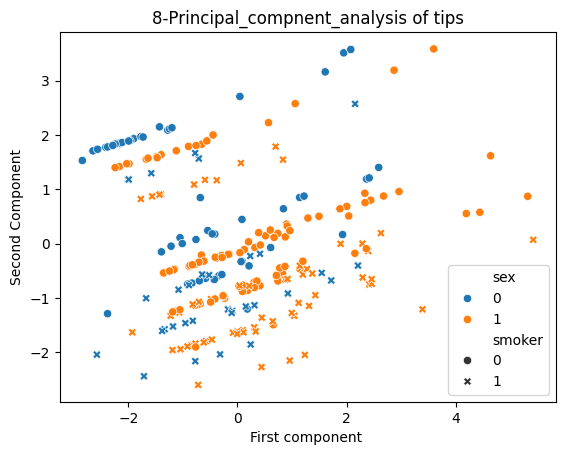

In [12]:
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np 
# load the data 
df = sns.load_dataset('tips')
# label encoding this data 
cat = df.select_dtypes(include=['object','category']).columns 
le = LabelEncoder()
for col in cat:
    df[col]=le.fit_transform(df[col])

# scalling this data 
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

# now fit on this data 
pca = PCA()

# now fit on the data 
pca_tips = pca.fit_transform(df_scaled)
# plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Explained variance')
plt.title('Explained varince by principal components')
plt.grid(True)
plt.show()
# create a dataframe to show loading score
loading = pd.DataFrame(pca.components_.T,columns=[f'pc{i+1}'for i in range(pca.n_components_)] ,index=df.columns)
print(loading)

# now plot the pca tips 
sns.scatterplot(x=pca_tips[:,0],y=pca_tips[:,1],hue=df['sex'],style=df['smoker'])
plt.title('8-Principal_compnent_analysis of tips')
plt.xlabel('First component ')
plt.ylabel('Second Component')
plt.show()
# to draw egien vector
def eigen_vector(component):
    '''
    This function is used to draw eigen vectors for each component
    :param component: int
        It represents number of component for which we want to see the eigen vector
        '''
    

